# Bike Store Sales

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Loading the data

In [3]:
%alias head powershell -command "& {Get-Content %s -Head 5}"

%head sales_data.csv

Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088


In [6]:
# read the csv data into python
sales = pd.read_csv('sales_data.csv', parse_dates=['Date'])

## The data at a glance:

In [7]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [24]:
#how many rows and column we have 
sales.shape

(113036, 18)

In [26]:
#properties/types of the dataset (columns) i.e int
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [27]:
#statistical properties (mean,min,max)...quick statistical view of the data
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


### Numerical Analysis and Visualization

Analyze Unit_Cost column:

In [28]:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [31]:
sales['Unit_Cost'].mean()

267.296365759581

In [32]:
sales['Unit_Cost'].median()

9.0

<AxesSubplot:>

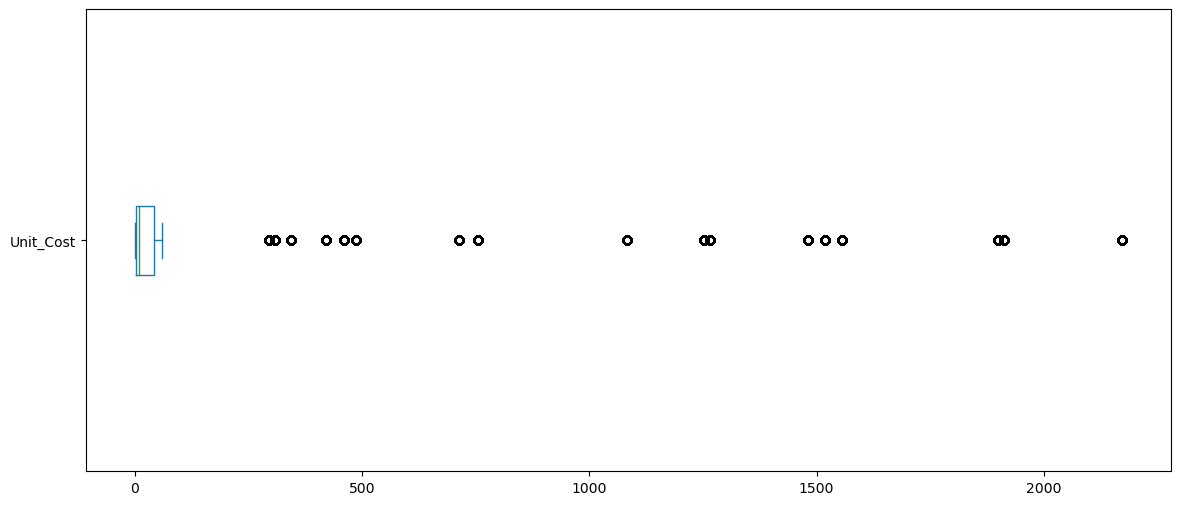

In [38]:
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6))

<AxesSubplot:ylabel='Density'>

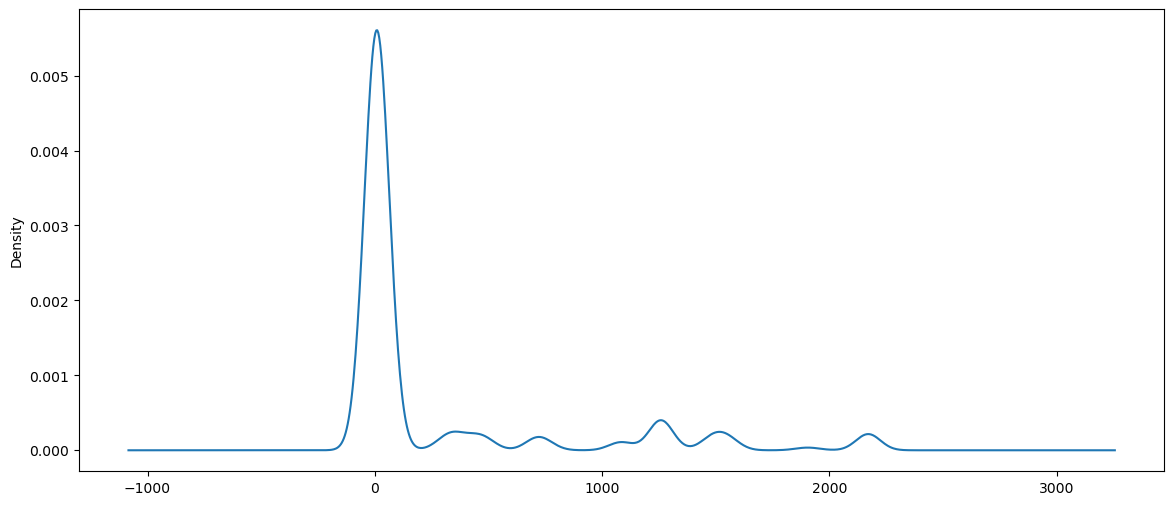

In [40]:
#density plot
sales['Unit_Cost'].plot(kind='density', figsize=(14,6))

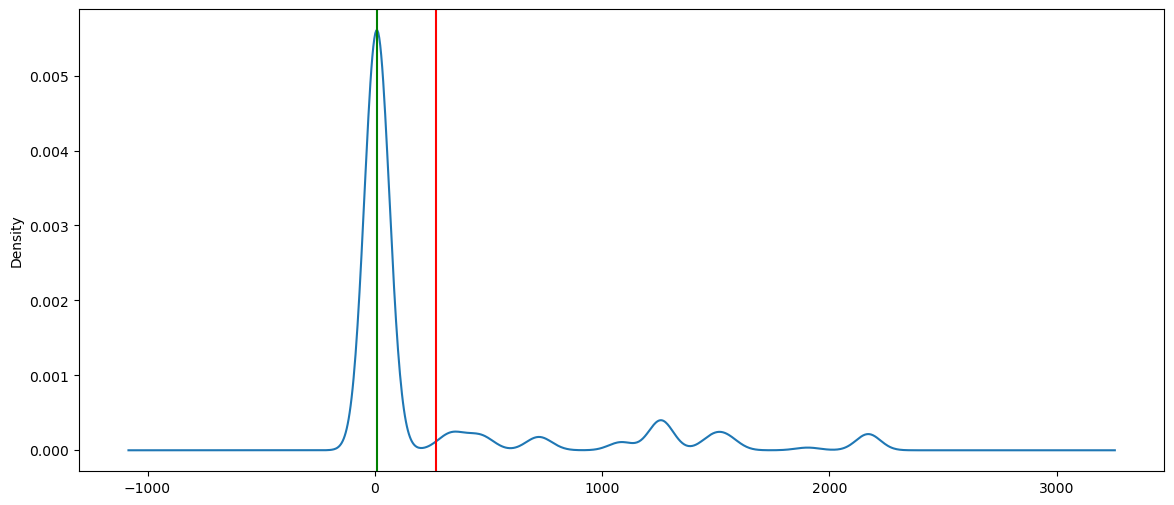

In [41]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,6))
ax.axvline(sales['Unit_Cost'].mean(), color='red')
ax.axvline(sales['Unit_Cost'].median(), color='green')

Text(0.5, 0, 'Dollars')

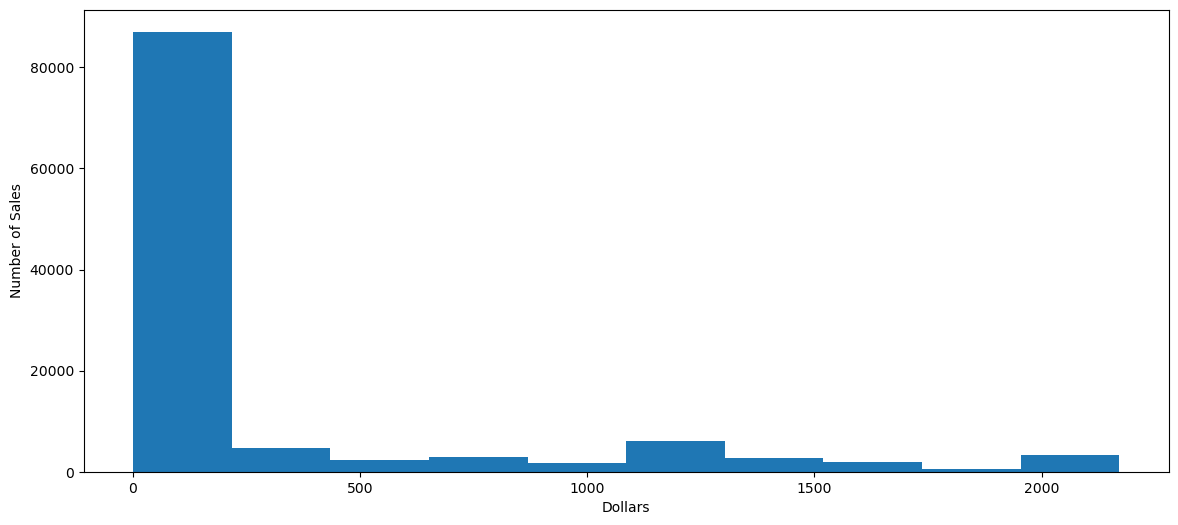

In [43]:
ax = sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('Dollars')

### Categorical Analysis and Visualization

Analyze Age_Group column: 

In [46]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [48]:
sales['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

<AxesSubplot:ylabel='Age_Group'>

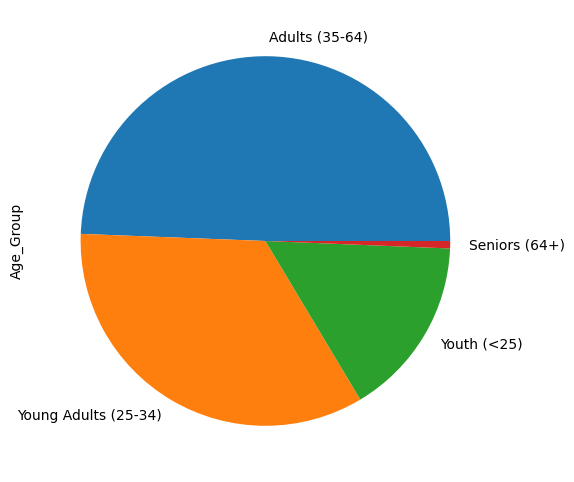

In [55]:
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0, 0.5, 'Number of Sales')

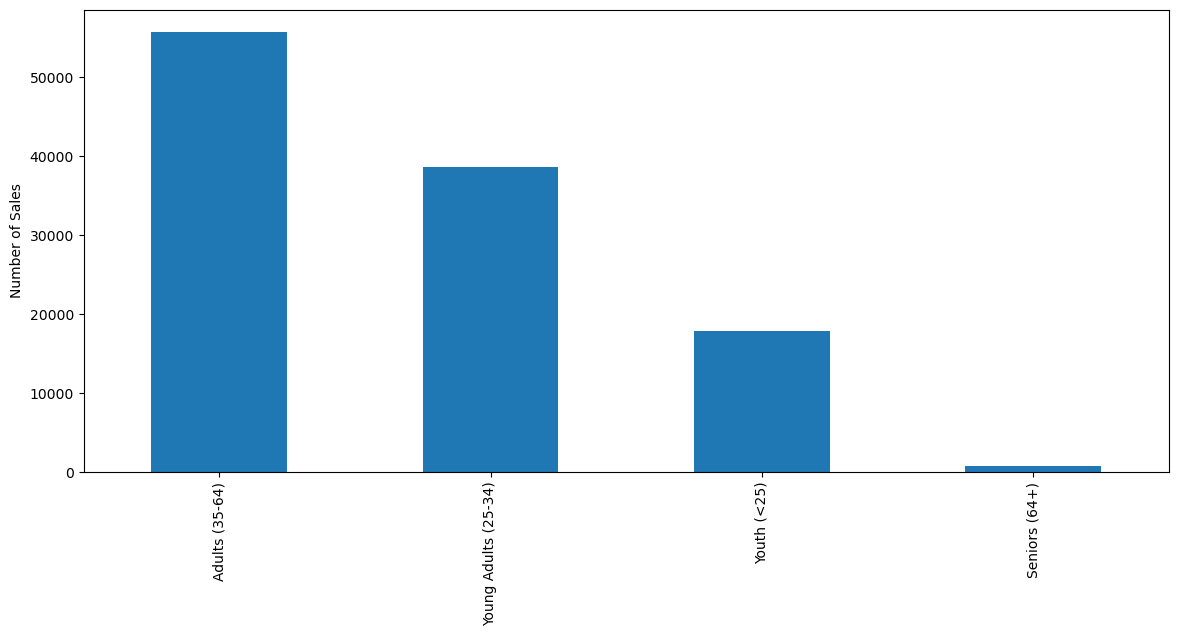

In [59]:
ax=sales['Age_Group'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Sales')

### Relationship between the columns

Some correlation analysis

Can we find any significant relationship?

In [61]:
corr =sales.corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


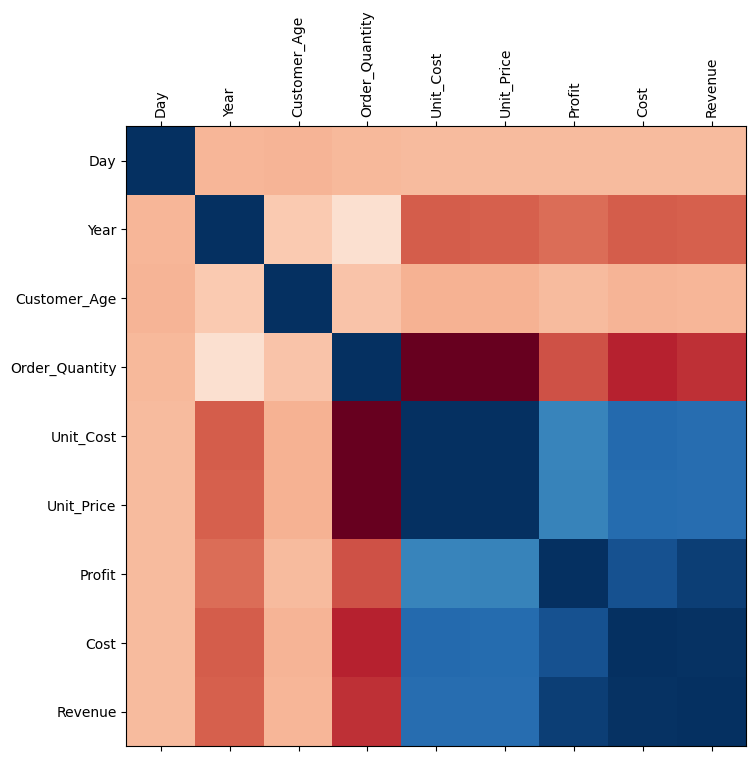

In [66]:
#matrix of correlation
#blue shows high correlation (1)
#deep red shows -ve correlation
fig=plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

<AxesSubplot:xlabel='Customer_Age', ylabel='Revenue'>

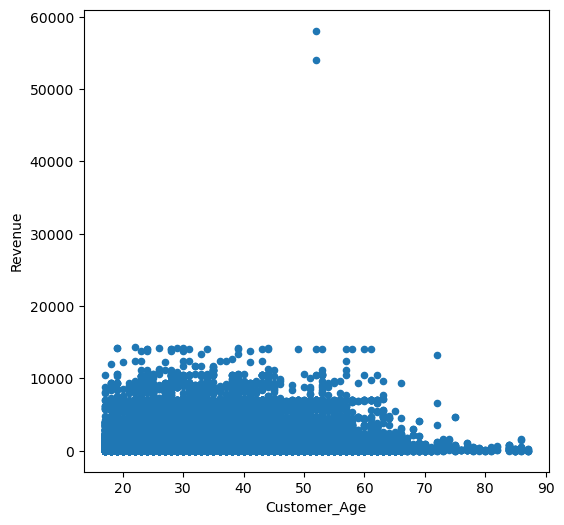

In [67]:
sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6))

In [101]:
#which country has the most sales quantity of sales
sales['Country'].value_counts().head(1)

United States    39206
Name: Country, dtype: int64

In [102]:
sales['Country'].value_counts()

United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: Country, dtype: int64

<AxesSubplot:>

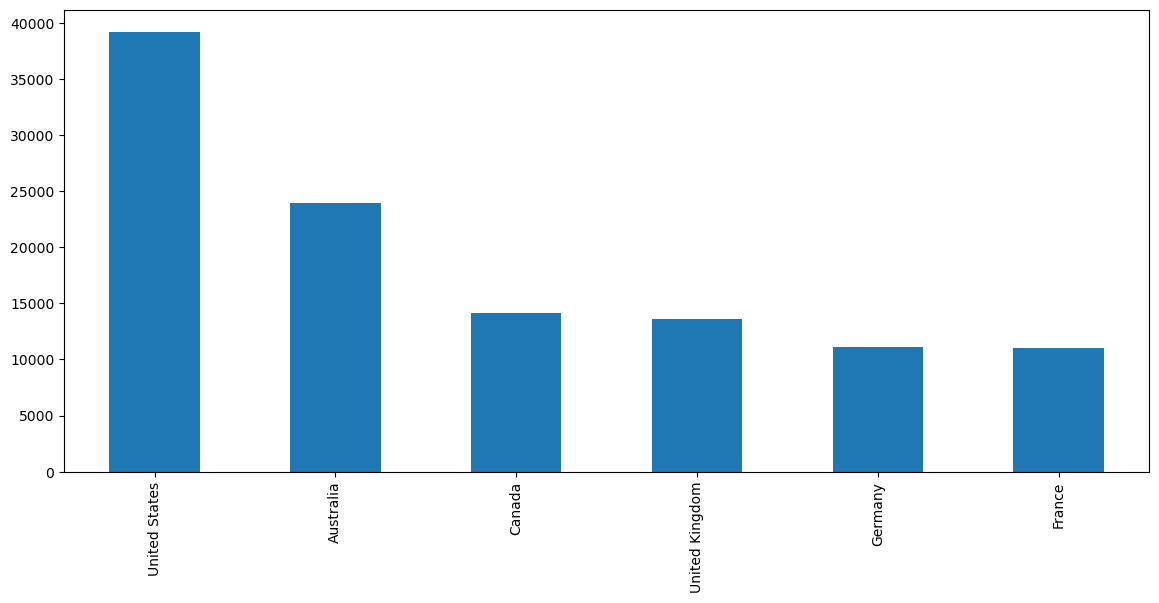

In [104]:
sales['Country'].value_counts().plot(kind='bar', figsize=(14,6))

###### Create a list of every product sold

In [8]:
sales['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

###### Create a bar plot showing the 10 most sold products (best sellers)

<AxesSubplot:>

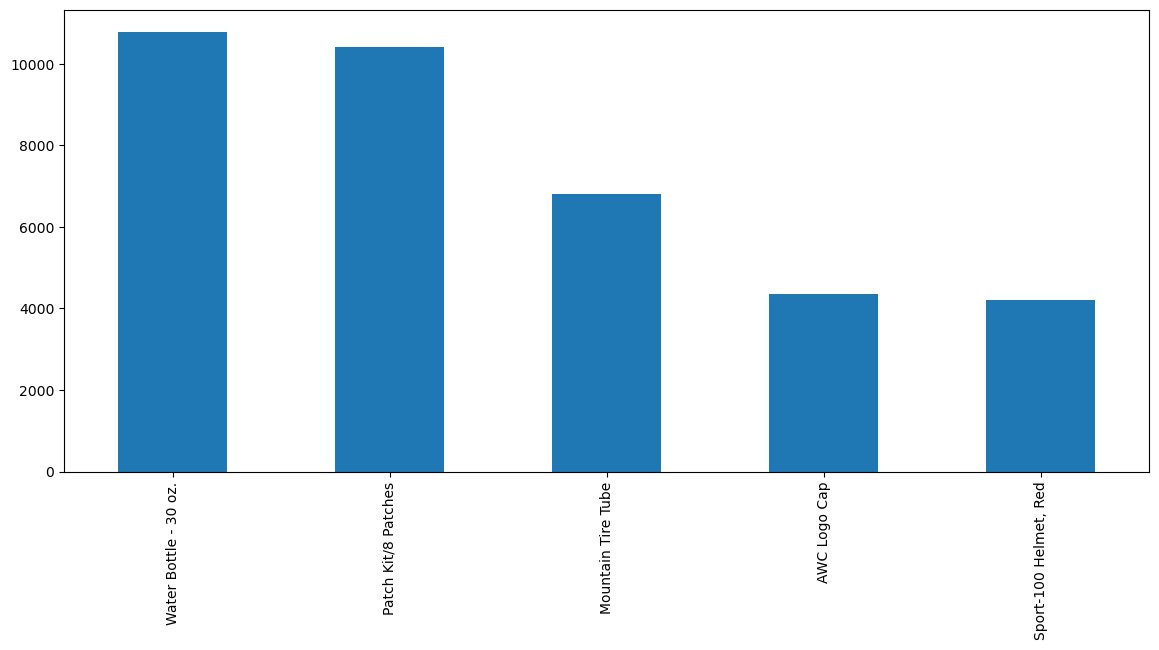

In [11]:
sales['Product'].value_counts().head().plot(kind='bar', figsize=(14,6))

###### Relationship between Unit_Cost and Unit_Price

<AxesSubplot:xlabel='Unit_Cost', ylabel='Unit_Price'>

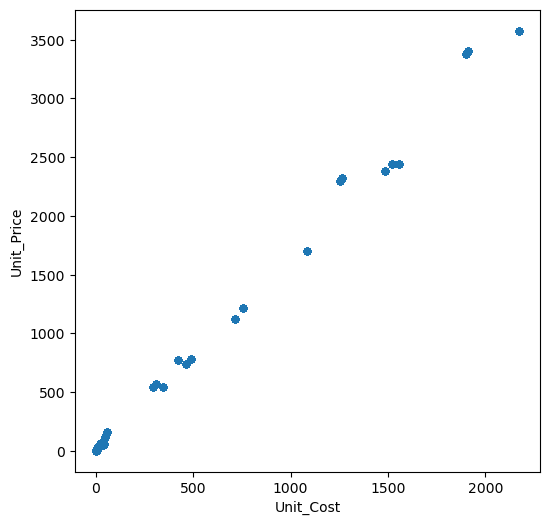

In [13]:
#linear independence
sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(6,6))

###### Relationship between Order_Quantity and Profit

<AxesSubplot:xlabel='Order_Quantity', ylabel='Profit'>

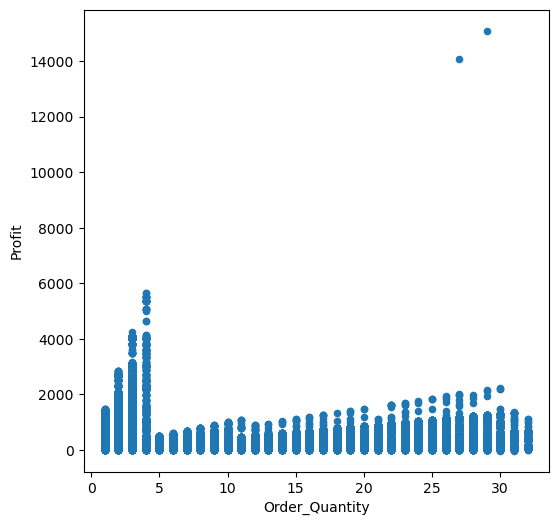

In [14]:
sales.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize=(6,6))

###### Relationship between Profit per Country

<AxesSubplot:title={'center':'Profit'}, xlabel='[Country]'>

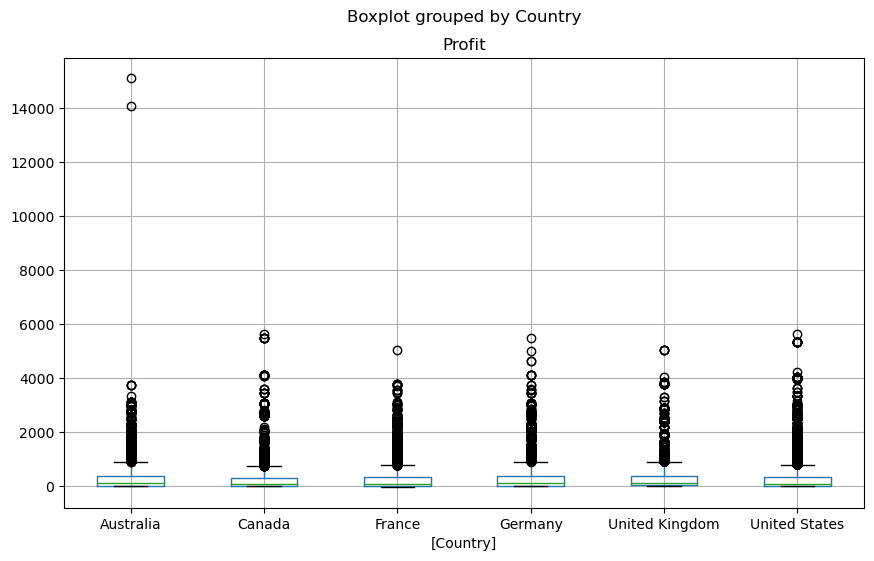

In [19]:
#Show a grouped box plot per country with the profit values
sales[['Profit','Country']].boxplot(by='Country', figsize=(10,6))

###### Relationship between the Customer_Age per Country

<AxesSubplot:title={'center':'Customer_Age'}, xlabel='[Country]'>

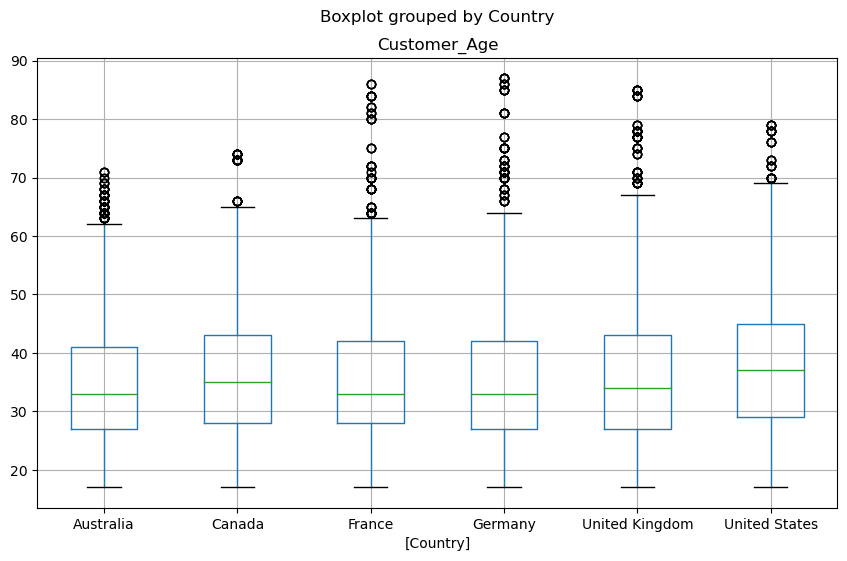

In [20]:
sales[['Customer_Age','Country']].boxplot(by='Country', figsize=(10,6))

###### Add and calculate a new Calculated_Date column

In [23]:
# Use Day, Month, Year to create a Date column (YYYY-MM-DD)
sales['Calculated_Date'] = sales[['Year', 'Month','Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)

sales['Calculated_Date'].head()

0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Calculated_Date, dtype: object

###### Parse Calculated_Date column into a datetime object

In [25]:
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])

sales['Calculated_Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

###### How did sales evolve through the years?
Show a line plot using Calculated_Date column as the x-axis and the count of sales as the y-axis.

<AxesSubplot:>

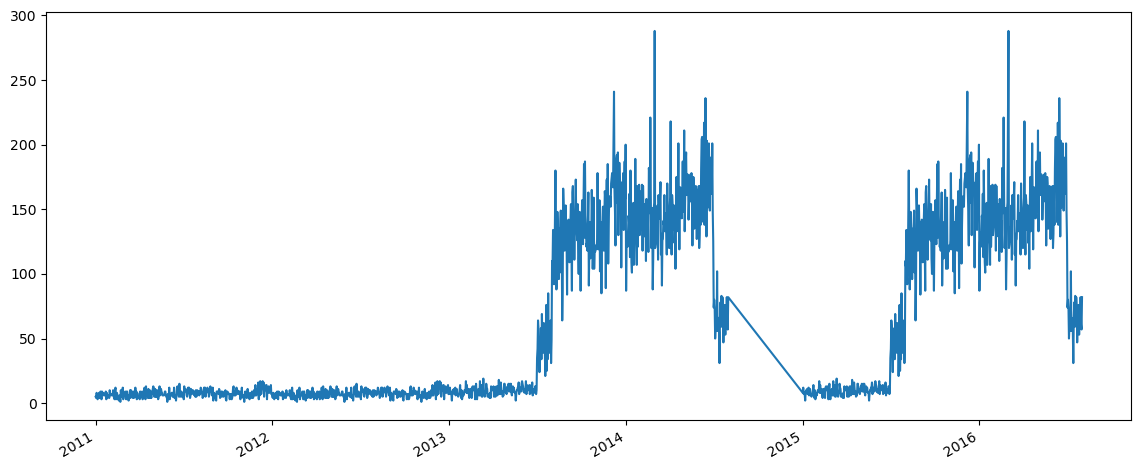

In [29]:
sales['Calculated_Date'].value_counts().plot(kind='line', figsize=(14,6))

###### Increase 50 U$S revenue to every sale

In [30]:
#sales['Revenue'] = sales['Revenue'] + 50
sales['Revenue'] +=50

<AxesSubplot:ylabel='Density'>

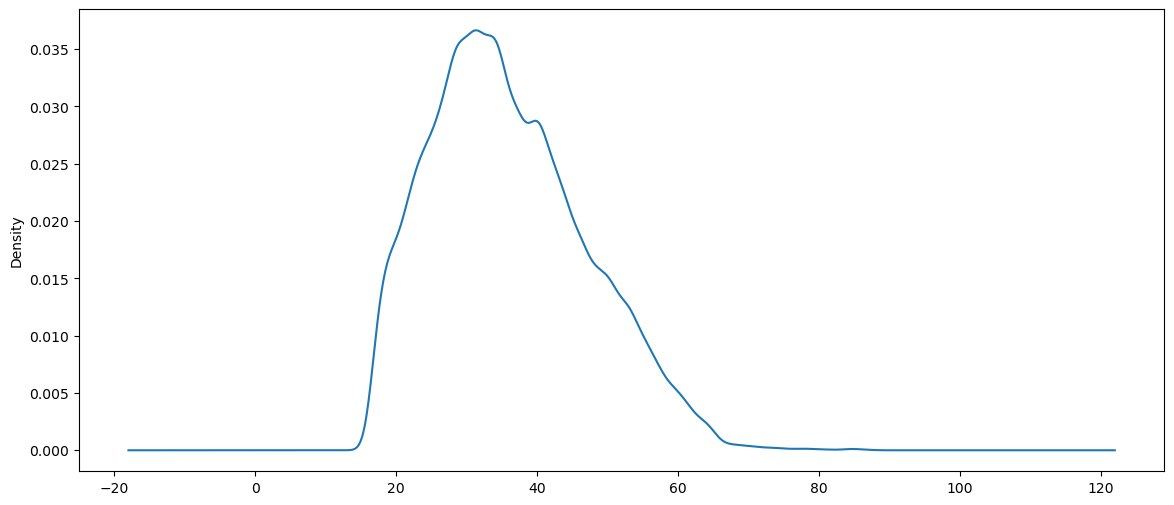

In [100]:
sales['Customer_Age'].plot(kind='kde', figsize=(14,6))

<AxesSubplot:xlabel='Revenue', ylabel='Profit'>

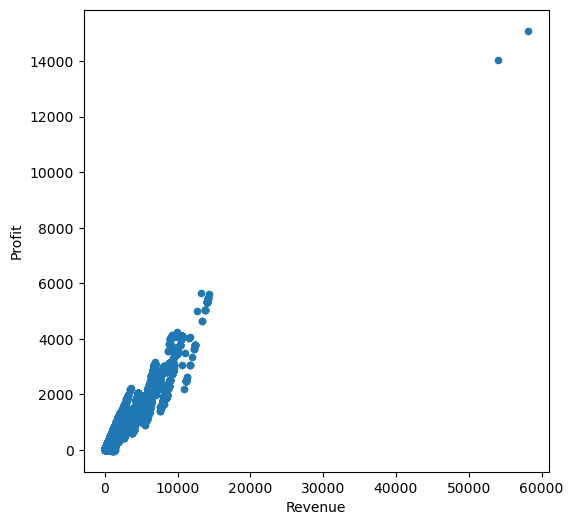

In [68]:
#here we have a linear dependency
sales.plot(kind='scatter', x='Revenue', y='Profit', figsize=(6,6))

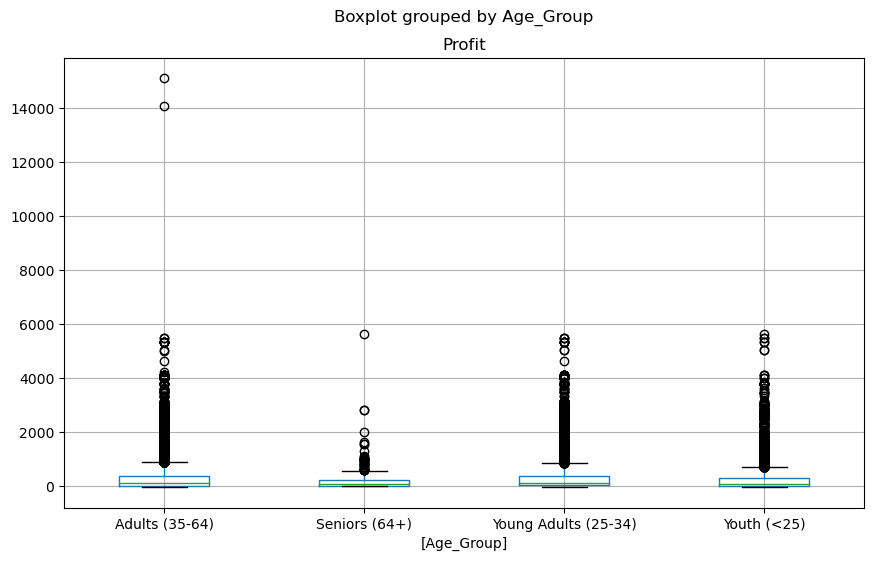

In [69]:
#understanding profit per age group
ax = sales[['Profit','Age_Group']].boxplot(by='Age_Group', figsize=(10,6))

Year                 AxesSubplot(0.125,0.53;0.227941x0.35)
Customer_Age      AxesSubplot(0.398529,0.53;0.227941x0.35)
Order_Quantity    AxesSubplot(0.672059,0.53;0.227941x0.35)
Unit_Cost            AxesSubplot(0.125,0.11;0.227941x0.35)
Unit_Price        AxesSubplot(0.398529,0.11;0.227941x0.35)
Profit            AxesSubplot(0.672059,0.11;0.227941x0.35)
dtype: object

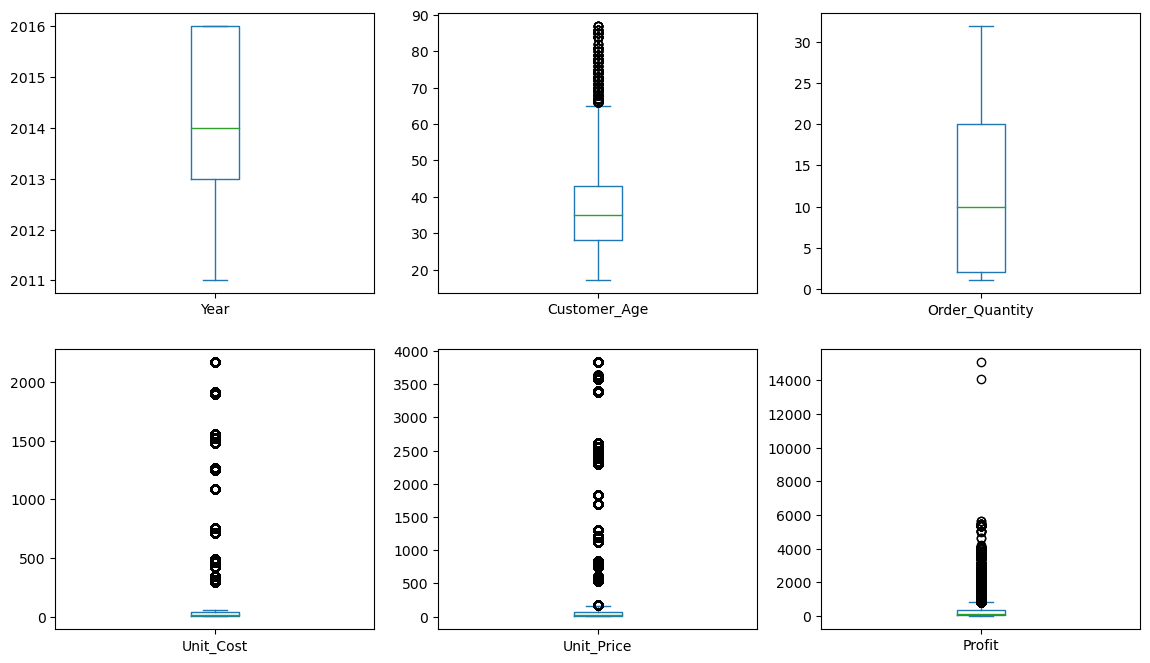

In [69]:
boxplot_cols=['Year','Customer_Age','Order_Quantity','Unit_Cost','Unit_Price','Profit']

sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

### Column Wrangling

Create new columns or modify existing ones.

#### Add and calculate a new Revenue_per_Age column

In [71]:
sales['Revenue_per_Age'] = sales['Revenue']/sales['Customer_Age']

sales['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

<AxesSubplot:ylabel='Density'>

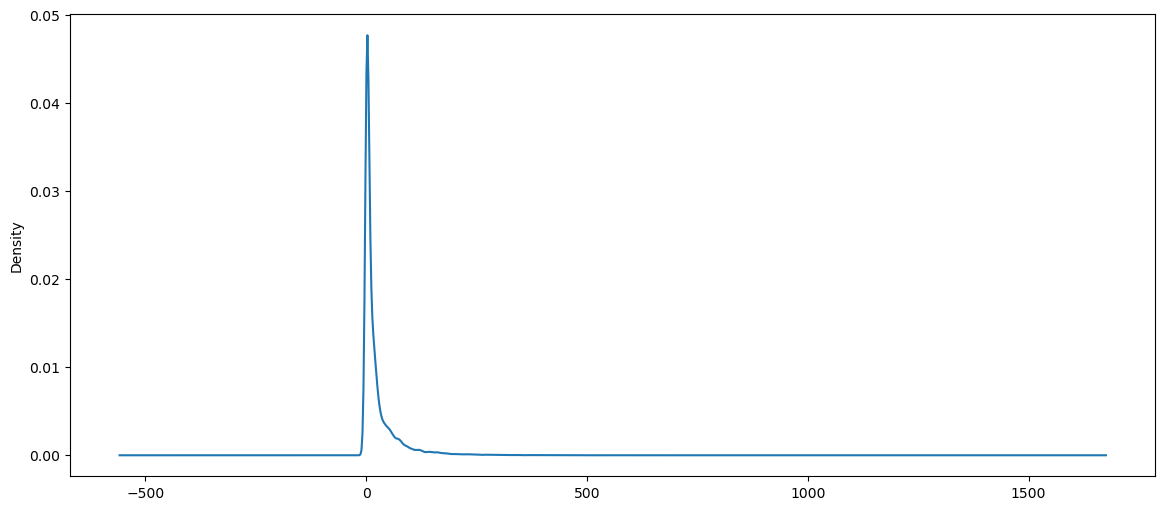

In [72]:
sales['Revenue_per_Age'].plot(kind='density', figsize=(14,6))

<AxesSubplot:ylabel='Frequency'>

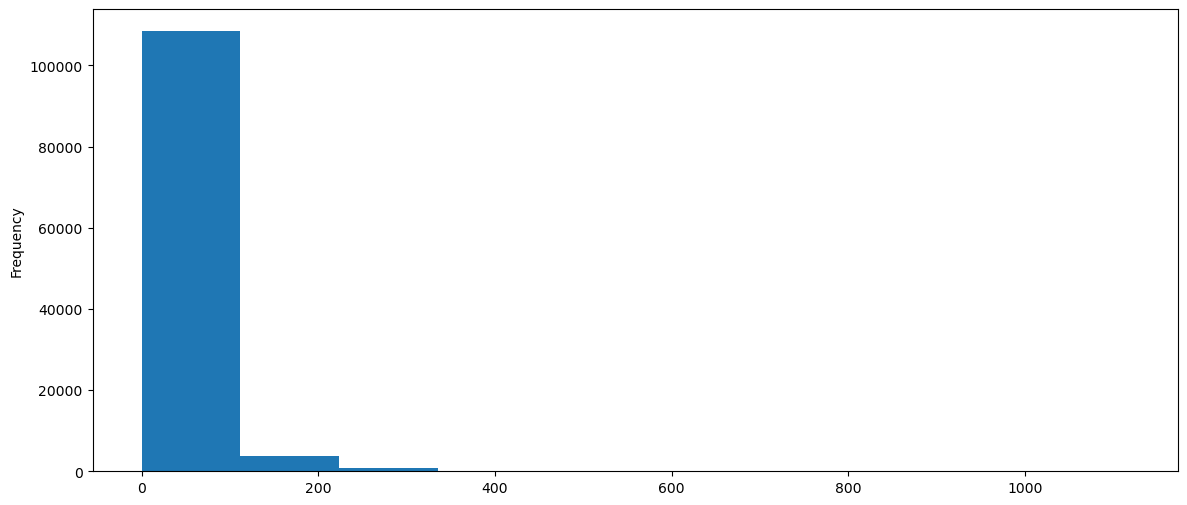

In [73]:
sales['Revenue_per_Age'].plot(kind='hist',figsize=(14,6))

### Add and calculate a new Calculated_Cost column

Formula:  Calculated_Cost=Order_Quantity * Unit_Cost

In [76]:
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']
sales['Calculated_Cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

In [78]:
#how many rows had a different value than what was provided by cost
#check if this new column is different from cost
(sales['Calculated_Cost'] != sales['Cost']).sum()

0

<AxesSubplot:xlabel='Calculated_Cost', ylabel='Profit'>

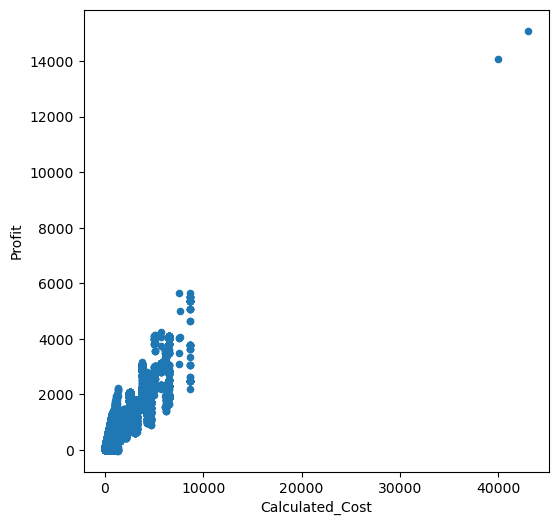

In [79]:
sales.plot(kind='scatter', x='Calculated_Cost', y='Profit', figsize=(6,6))

### Add and calculate a new Calculated_Revenue column

Formula:  Calculated_Revenue = Cost + Profit

In [81]:
sales['Calculated_Revenue'] = sales['Cost'] + sales['Profit']

sales['Calculated_Revenue'].head()

0     950
1     950
2    2401
3    2088
4     418
Name: Calculated_Revenue, dtype: int64

In [83]:
#how many rows had a different value than what was provided by Revenue
#check if this new column is different from Revenue
(sales['Calculated_Revenue'] != sales['Revenue']).sum()

0

In [84]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,49.000000,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,42.612245,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4,45,120,238,180,418,8.893617,180,418


<AxesSubplot:ylabel='Frequency'>

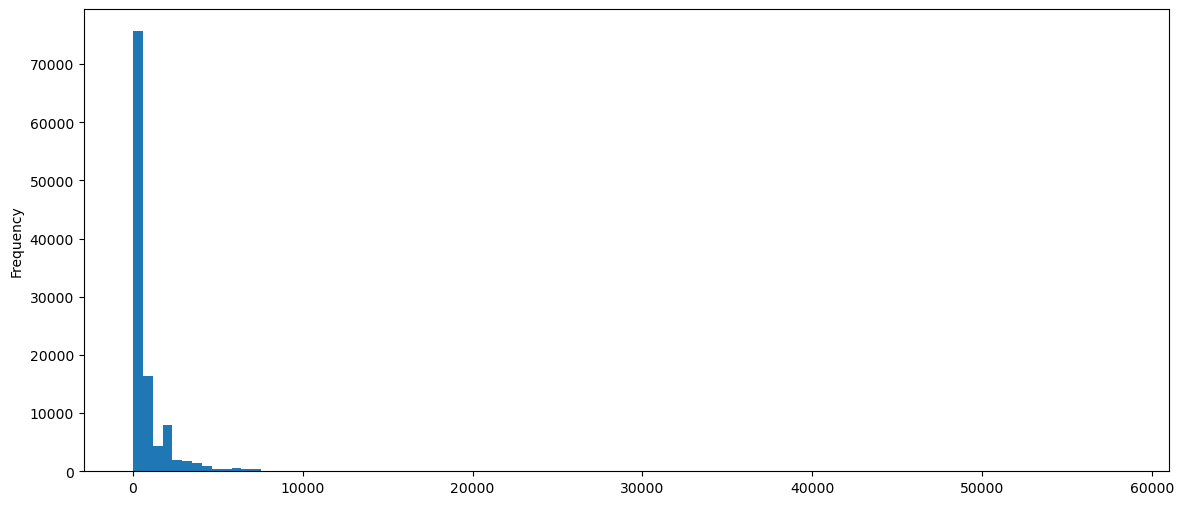

In [85]:
sales['Revenue'].plot(kind='hist', bins=100, figsize=(14,6))

### Modify Unit_Price values by adding 3% tax to them

In [86]:
sales['Unit_Price'].head()

0    120
1    120
2    120
3    120
4    120
Name: Unit_Price, dtype: int64

In [87]:
#sales['Unit_Price'] = sales['Unit_Price'] *=1.03
sales['Unit_Price'] *= 1.03

In [88]:
sales['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

### Selection and Indexing

##### Get all the sales made in the state of Kentucky

In [90]:
#loc method allows one to access a group of rows and columns by supplying label(s) arguments
sales.loc[sales['State'] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,12,8,22.66,142,96,238,5.950,96,238
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,14,8,22.66,165,112,277,6.925,112,277
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",29,13,36.05,537,377,914,22.850,377,914
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",31,13,36.05,574,403,977,24.425,403,977
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,2,11,30.90,32,22,54,1.350,22,54
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,21,11,30.90,336,231,567,14.175,231,567
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,1,11,30.90,16,11,27,0.675,11,27
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,18,11,30.90,288,198,486,12.150,198,486


#### Get the mean revenue of the Adults (35-64) sales group

In [94]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

#### How many records belong to Age Group Youth (<25) or Adults (35-64)?

In [95]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape[0]

73652

#### Get the mean revenue of the sales group Adults (35-64) in United States

In [96]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)')  & (sales['Country'] == 'United States'), 'Revenue'].mean()

726.7260473588342

#### Increase the revenue by 10% to every sale made in France

In [97]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     787
51     787
52    2957
53    2851
60     626
Name: Revenue, dtype: int64

In [98]:
#sales.loc[sales['Country'] == 'France', 'Revenue'] == sales.loc[sales['Country'] == 'France', 'Revebue'] *1.1
sales.loc[sales['Country'] == 'France', 'Revenue'] *=1.1

In [99]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     865.7
51     865.7
52    3252.7
53    3136.1
60     688.6
Name: Revenue, dtype: float64

###### How many orders were made in Canada or France?

In [32]:
sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

25176

###### How many Bike Racks orders were made from Canada?

In [33]:
sales.loc[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]

104

###### How many orders were made in each region (state) of France?

In [34]:
france_states = sales.loc[sales['Country'] == 'France', 'State'].value_counts()
france_states

Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: State, dtype: int64

<AxesSubplot:>

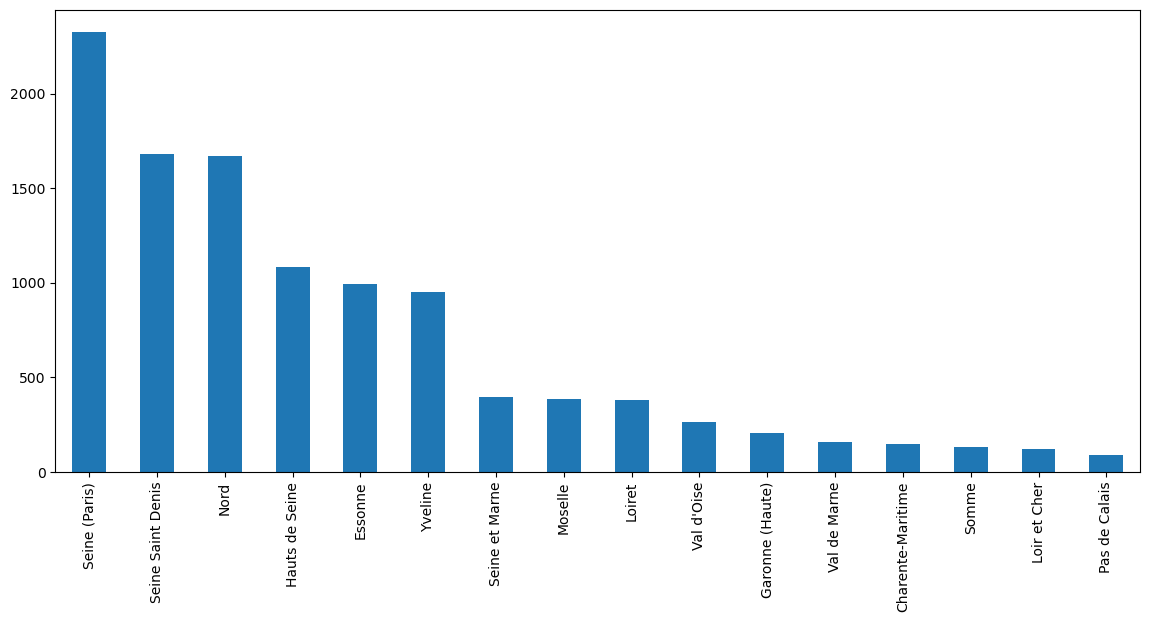

In [35]:
#Show a bar plot with the results:
france_states.plot(kind='bar', figsize=(14,6))

###### How many sales were made per category?

In [36]:
sales['Product_Category'].value_counts()

Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

<AxesSubplot:ylabel='Product_Category'>

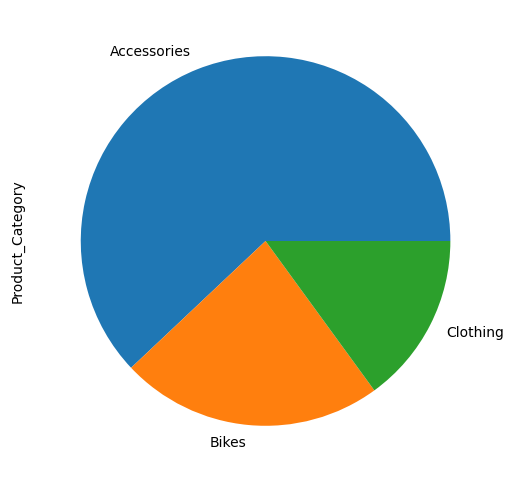

In [38]:
#show a pie plot with the results:
sales['Product_Category'].value_counts().plot(kind='pie', figsize=(6,6))

###### How many orders were made per accessory sub-categories?

In [40]:
accessories = sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()

accessories

Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

<AxesSubplot:>

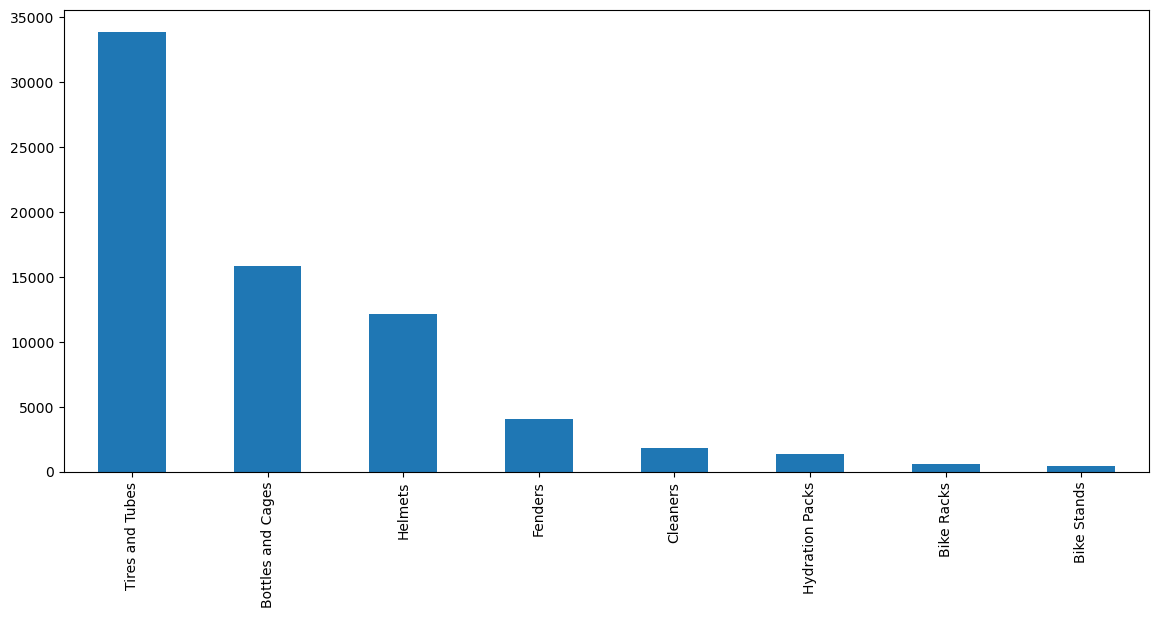

In [43]:
#show a bar plot with the results:
accessories.plot(kind='bar', figsize=(14,6))

###### How many orders were made per bike sub-categories?

In [45]:
bikes = sales.loc[sales['Product_Category'] == 'Bikes', 'Sub_Category'].value_counts()
bikes

Road Bikes        13430
Mountain Bikes     8854
Touring Bikes      3698
Name: Sub_Category, dtype: int64

<AxesSubplot:ylabel='Sub_Category'>

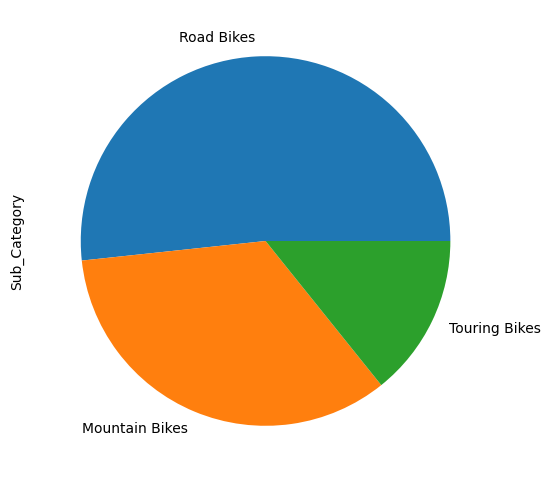

In [47]:
#show a bar plot with the results:
bikes.plot(kind='pie', figsize=(14,6))

###### Which gender has the most amount of sales?

In [48]:
sales['Customer_Gender'].value_counts()

M    58312
F    54724
Name: Customer_Gender, dtype: int64

<AxesSubplot:>

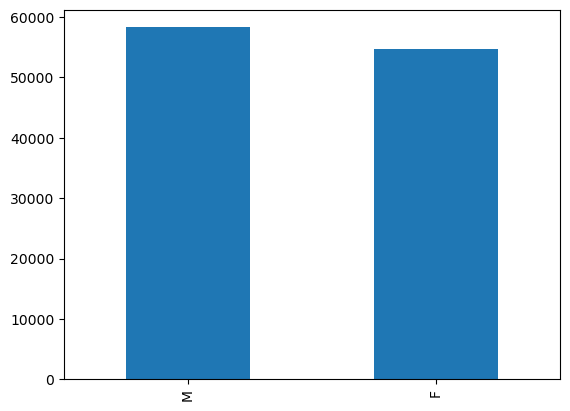

In [49]:
sales['Customer_Gender'].value_counts().plot(kind='bar')

###### How many sales with more than 500 in Revenue were made by men?

In [52]:
sales.loc[(sales['Customer_Gender'] == 'M') & (sales['Revenue'] == 500)].shape[0]

50

###### Get the top-5 sales with the highest revenue

In [53]:
sales.sort_values(['Revenue'], ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58124,2015-07-24
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54119,2013-07-24
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14362,2011-07-08
70307,2011-04-30,30,April,2011,44,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14219,2011-04-30
70601,2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14219,2011-09-30


###### Get the sales with the highest revenue

In [54]:
#sales.sort_values(['Revenue'], ascending=False).head(1)
cond = sales['Revenue'] == sales['Revenue'].max()

sales.loc[cond]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58124,2015-07-24


In [55]:
sales.sort_values(['Revenue'], ascending=False).head(1)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58124,2015-07-24


###### What is the mean Order_Quantity of orders with more than 10K in revenue?

In [56]:
cond = sales['Revenue'] > 10000

sales.loc[cond, 'Order_Quantity'].mean()

3.689265536723164

###### How many orders were made in May of 2016?

In [57]:
cond = (sales['Year'] == 2016) & (sales['Month'] == 'May')

sales.loc[cond].shape[0]

5015

###### How many orders were made between May and July of 2016?

In [59]:
cond = (sales['Year'] == 2016) & (sales['Month'].isin(['May','June','July']))

sales.loc[cond].shape[0]

12164

###### Show a grouped box plot per month with the profit values

<AxesSubplot:title={'center':'Profit'}, xlabel='[Month]'>

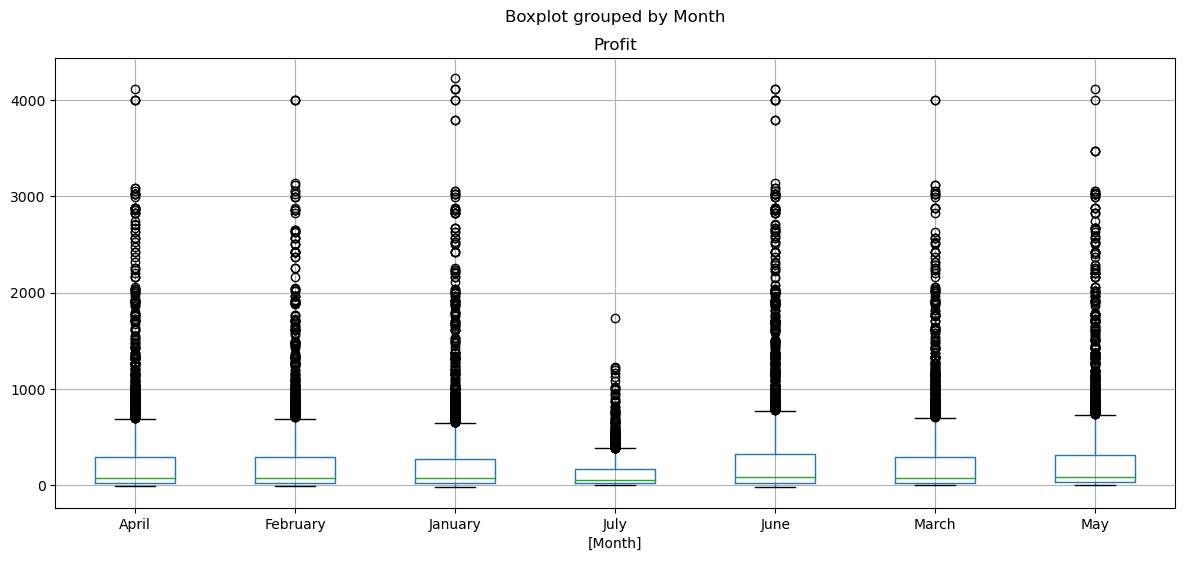

In [61]:
profit_2016 = sales.loc[sales['Year'] == 2016, ['Profit', 'Month']]
profit_2016.boxplot(by='Month', figsize=(14,6))

###### Add 7.2% TAX on every sale Unit_Price within United States

In [64]:
#sales.loc[sales['Country'] == 'United States', 'Unit_Price'] = sales.loc[sales['Country'] == 'United States', 'Unit_Price'] * 1.072
sales.loc[sales['Country'] == 'United_States', 'Unit_Price'] *=1.072